In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,precision_recall_fscore_support

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
data = pd.read_csv("AI_Human.csv")


In [5]:
data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [6]:
print("Total :", len(data["generated"]))
print("Total text by AI :",len(data[data["generated"]== 1.0]))
print("Total text by Human :",len(data[data["generated"]==0.0]) )

Total : 487235
Total text by AI : 181438
Total text by Human : 305797


In [7]:
p_ai = len(data[data["generated"]== 1.0])/len(data["generated"]) *100
p_human = len(data[data["generated"]==0.0])/len(data["generated"])*100
print("Percentage (AI)= ", p_ai)
print("Percentage (Human)= ", p_human)

Percentage (AI)=  37.23829363654089
Percentage (Human)=  62.76170636345911


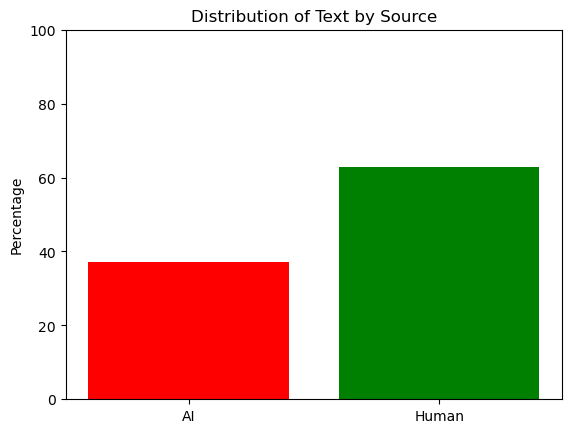

In [8]:
import matplotlib.pyplot as plt

categories = ['AI', 'Human']
percentages = [p_ai, p_human]

# Create bar chart
plt.bar(categories, percentages, color=['red', 'green'])
plt.ylabel('Percentage')
plt.title('Distribution of Text by Source')
plt.ylim(0, 100)
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [ ]:
def preprocess_text(text):

    text = text.lower()
    


    tokens = word_tokenize(text)
    

    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    

    return ' '.join(tokens)

In [15]:
data['cleaned_comment'] = data['text'].apply(preprocess_text)

In [16]:
data.head()

,text,generated,cleaned_comment
0,Cars. Cars have been around since they became ...,0.0,"cars . cars around since became famous 1900s ,..."
1,Transportation is a large necessity in most co...,0.0,transportation large necessity countries world...
2,"""America's love affair with it's vehicles seem...",0.0,`` america 's love affair 's vehicles seems co...
3,How often do you ride in a car? Do you drive a...,0.0,often ride car ? drive one motor vehicle work ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,cars wonderful thing . perhaps one worlds grea...


In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    tokens = word_tokenize(text)
    
    

    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    return ' '.join(tokens)

data['cleaned_comment'] = data['cleaned_comment'].apply(lemmatize)


In [18]:
data.head()

,text,generated,cleaned_comment
0,Cars. Cars have been around since they became ...,0.0,"car . car around since became famous 1900s , h..."
1,Transportation is a large necessity in most co...,0.0,transportation large necessity country worldwi...
2,"""America's love affair with it's vehicles seem...",0.0,`` america 's love affair 's vehicle seems coo...
3,How often do you ride in a car? Do you drive a...,0.0,often ride car ? drive one motor vehicle work ...
4,Cars are a wonderful thing. They are perhaps o...,0.0,car wonderful thing . perhaps one world greate...


In [19]:
data['generated'] = data['generated'].astype(int)

In [20]:
data.head()

,text,generated,cleaned_comment
0,Cars. Cars have been around since they became ...,0,"car . car around since became famous 1900s , h..."
1,Transportation is a large necessity in most co...,0,transportation large necessity country worldwi...
2,"""America's love affair with it's vehicles seem...",0,`` america 's love affair 's vehicle seems coo...
3,How often do you ride in a car? Do you drive a...,0,often ride car ? drive one motor vehicle work ...
4,Cars are a wonderful thing. They are perhaps o...,0,car wonderful thing . perhaps one world greate...


In [21]:
def text_length(text):
    return len(text)

data["length"]  = data["text"].apply(text_length)

In [27]:
data.drop("length", axis=1, inplace=True)

In [30]:
data.rename(columns={"Length": "length"}, inplace=True)

In [31]:
data.head()

,text,generated,length,cleaned_comment
0,Cars. Cars have been around since they became ...,0,3289,"car . car around since became famous 1900s , h..."
1,Transportation is a large necessity in most co...,0,2738,transportation large necessity country worldwi...
2,"""America's love affair with it's vehicles seem...",0,4428,`` america 's love affair 's vehicle seems coo...
3,How often do you ride in a car? Do you drive a...,0,4013,often ride car ? drive one motor vehicle work ...
4,Cars are a wonderful thing. They are perhaps o...,0,4698,car wonderful thing . perhaps one world greate...


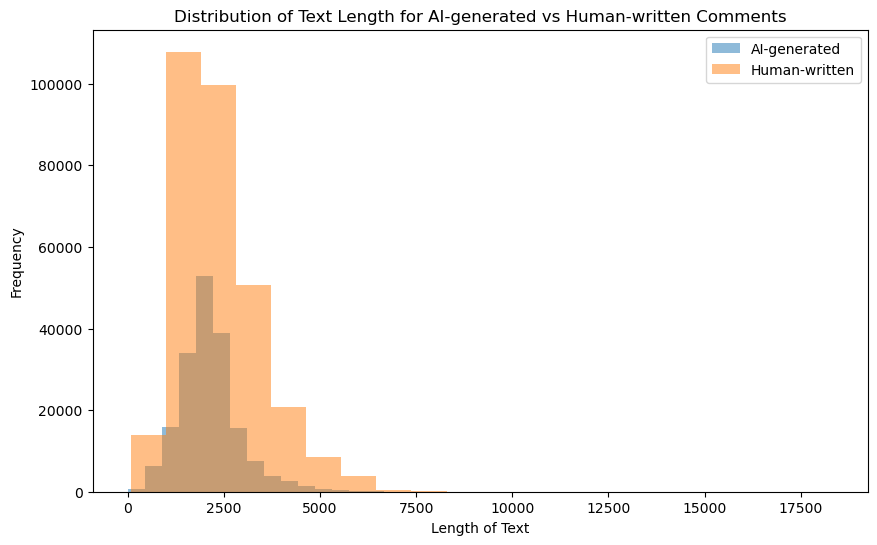

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(data[data['generated'] == 1]['length'], bins=20, alpha=0.5, label='AI-generated')
plt.hist(data[data['generated'] == 0]['length'], bins=20, alpha=0.5, label='Human-written')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for AI-generated vs Human-written Comments')
plt.legend()
plt.show()

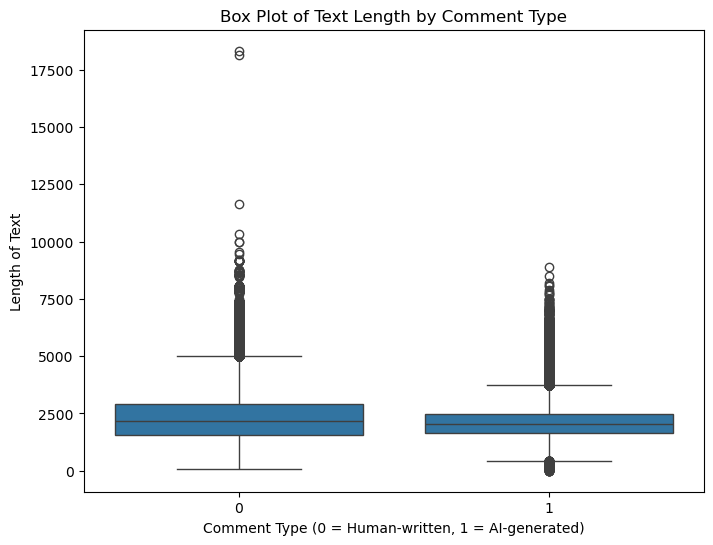

In [33]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='generated', y='length', data=data)
plt.xlabel('Comment Type (0 = Human-written, 1 = AI-generated)')
plt.ylabel('Length of Text')
plt.title('Box Plot of Text Length by Comment Type')
plt.show()

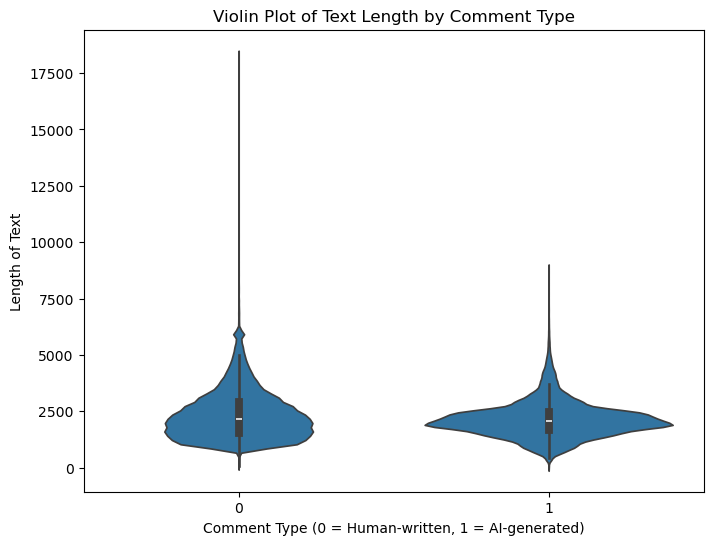

In [34]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='generated', y='length', data=data)
plt.xlabel('Comment Type (0 = Human-written, 1 = AI-generated)')
plt.ylabel('Length of Text')
plt.title('Violin Plot of Text Length by Comment Type')
plt.show()

In [35]:
avg_length_ai_generated = data[data['generated'] == 1]['length'].mean()
avg_length_human_written = data[data['generated'] == 0]['length'].mean()

In [36]:
print("Average length of AI-generated comments:", avg_length_ai_generated)
print("Average length of human-written comments:", avg_length_human_written)

Average length of AI-generated comments: 2126.316411115643
Average length of human-written comments: 2354.592837732221


In [37]:
data.head()

,text,generated,length,cleaned_comment
0,Cars. Cars have been around since they became ...,0,3289,"car . car around since became famous 1900s , h..."
1,Transportation is a large necessity in most co...,0,2738,transportation large necessity country worldwi...
2,"""America's love affair with it's vehicles seem...",0,4428,`` america 's love affair 's vehicle seems coo...
3,How often do you ride in a car? Do you drive a...,0,4013,often ride car ? drive one motor vehicle work ...
4,Cars are a wonderful thing. They are perhaps o...,0,4698,car wonderful thing . perhaps one world greate...


In [38]:
import textstat

In [39]:
def calculate_readability(text):
    scores = {
        "flesch_reading_ease": textstat.flesch_reading_ease(text),
        "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
     
    }
    return scores

data['flesch_reading_ease'] = data['text'].apply(textstat.flesch_reading_ease)
data['flesch_kincaid_grade'] = data['text'].apply(textstat.flesch_kincaid_grade)


In [40]:
data.head()

,text,generated,length,cleaned_comment,flesch_reading_ease,flesch_kincaid_grade
0,Cars. Cars have been around since they became ...,0,3289,"car . car around since became famous 1900s , h...",62.61,10.8
1,Transportation is a large necessity in most co...,0,2738,transportation large necessity country worldwi...,62.58,8.8
2,"""America's love affair with it's vehicles seem...",0,4428,`` america 's love affair 's vehicle seems coo...,55.74,9.3
3,How often do you ride in a car? Do you drive a...,0,4013,often ride car ? drive one motor vehicle work ...,65.73,7.6
4,Cars are a wonderful thing. They are perhaps o...,0,4698,car wonderful thing . perhaps one world greate...,70.84,7.7


In [41]:
avg_ease_ai_generated = data[data['generated'] == 1]['flesch_reading_ease'].mean()
avg_ease_human_written = data[data['generated'] == 0]['flesch_reading_ease'].mean()

avg_grade_ai_generated = data[data['generated'] == 1]['flesch_kincaid_grade'].mean()
avg_grade_human_written = data[data['generated'] == 0]['flesch_kincaid_grade'].mean()

In [42]:
print("EASE:    ","AI: ",avg_ease_ai_generated ,",", "HUMAN: ",avg_ease_human_written)
print("GRADE:    ","AI: ",avg_grade_ai_generated ,",", "HUMAN: ",avg_grade_human_written)

EASE:     AI:  53.78693564743879 , HUMAN:  69.08421518196712
GRADE:     AI:  10.55694341868848 , HUMAN:  9.01340791440073


In [43]:
data[data["generated"]==1].head(10)

,text,generated,length,cleaned_comment,flesch_reading_ease,flesch_kincaid_grade
704,"This essay will analyze, discuss and prove one...",1,1356,"essay analyze , discus prove one reason favor ...",66.67,9.3
740,I strongly believe that the Electoral College ...,1,1500,strongly believe electoral college remain way ...,56.08,11.3
1262,"Limiting car use causes pollution, increases c...",1,1797,"limiting car use cause pollution , increase co...",51.89,10.8
1378,Car-free cities have become a subject of incre...,1,4091,car-free city become subject increasing intere...,33.75,13.6
1379,"Car Free Cities Car-free cities, a concept ga...",1,3757,"car free city car-free city , concept gaining ...",26.10,14.5
1380,A Sustainable Urban Future Car-free cities ...,1,3828,sustainable urban future car-free city emergin...,26.81,14.2
1381,Pioneering Sustainable Urban Living In an e...,1,3739,pioneering sustainable urban living era marked...,23.16,15.6
1382,The Path to Sustainable Urban Living In an ...,1,3698,path sustainable urban living age rapid urbani...,22.55,15.9
1383,A Paradigm Shift in Urban Living In an era ...,1,3787,paradigm shift urban living era marked increas...,23.56,15.5
1384,Revolutionizing Urban Living In an age defi...,1,3787,revolutionizing urban living age defined ever-...,16.22,16.2


In [44]:
data[data["generated"]==0].head(10)

,text,generated,length,cleaned_comment,flesch_reading_ease,flesch_kincaid_grade
0,Cars. Cars have been around since they became ...,0,3289,"car . car around since became famous 1900s , h...",62.61,10.8
1,Transportation is a large necessity in most co...,0,2738,transportation large necessity country worldwi...,62.58,8.8
2,"""America's love affair with it's vehicles seem...",0,4428,`` america 's love affair 's vehicle seems coo...,55.74,9.3
3,How often do you ride in a car? Do you drive a...,0,4013,often ride car ? drive one motor vehicle work ...,65.73,7.6
4,Cars are a wonderful thing. They are perhaps o...,0,4698,car wonderful thing . perhaps one world greate...,70.84,7.7
5,The electrol college system is an unfair syste...,0,3311,"electrol college system unfair system , people...",61.60,11.2
6,"Dear state senator, It is the utmost respect t...",0,2551,"dear state senator , utmost respect ask method...",62.48,8.8
7,"Fellow citizens, cars have become a major role...",0,2470,"fellow citizen , car become major role daily l...",69.01,8.4
8,"""It's official: The electoral college is unfai...",0,2707,"`` 's official : electoral college unfair , ou...",69.31,8.3
9,The Electoral College has been kept for centur...,0,3290,"electoral college kept century , established f...",64.34,10.2


In [45]:
data.head()

,text,generated,length,cleaned_comment,flesch_reading_ease,flesch_kincaid_grade
0,Cars. Cars have been around since they became ...,0,3289,"car . car around since became famous 1900s , h...",62.61,10.8
1,Transportation is a large necessity in most co...,0,2738,transportation large necessity country worldwi...,62.58,8.8
2,"""America's love affair with it's vehicles seem...",0,4428,`` america 's love affair 's vehicle seems coo...,55.74,9.3
3,How often do you ride in a car? Do you drive a...,0,4013,often ride car ? drive one motor vehicle work ...,65.73,7.6
4,Cars are a wonderful thing. They are perhaps o...,0,4698,car wonderful thing . perhaps one world greate...,70.84,7.7


In [77]:
tfidf = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf.fit_transform(data['cleaned_comment'])

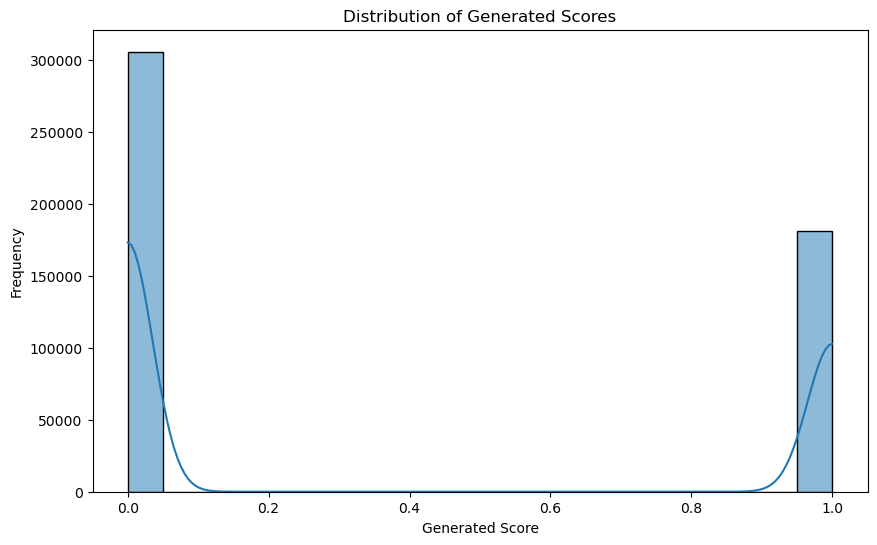

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data['generated'], bins=20, kde=True)
plt.title("Distribution of Generated Scores")
plt.xlabel("Generated Score")
plt.ylabel("Frequency")
plt.show()

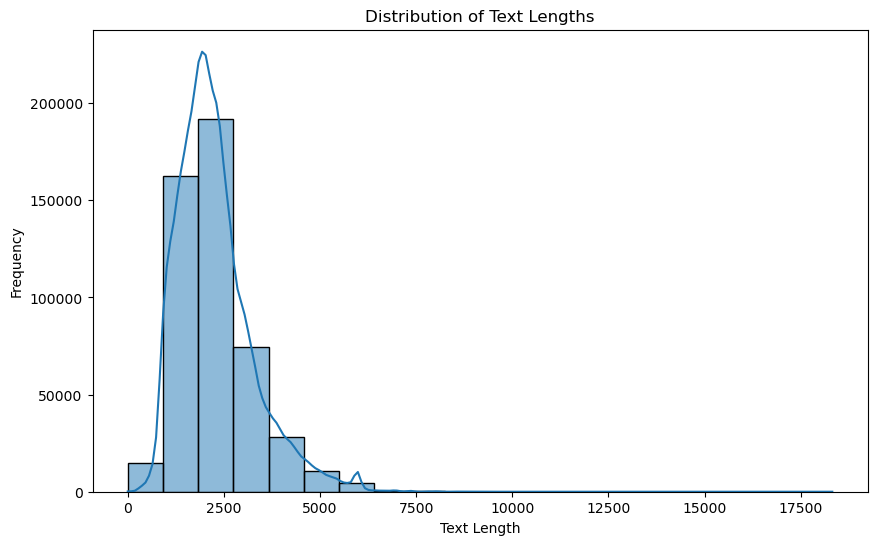

In [49]:

plt.figure(figsize=(10, 6))
sns.histplot(data['length'], bins=20, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

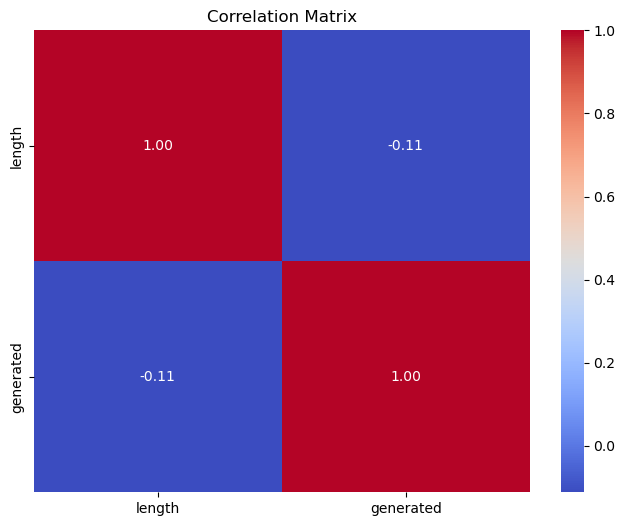

In [50]:
correlation = data[['length', 'generated']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [51]:
X = data['text']
y = data['generated'] 

In [58]:
data = data[["text", "cleaned_comment","length", "flesch_reading_ease", "flesch_kincaid_grade", "generated"]]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("generated", axis = 1), data['generated'], test_size=0.2, random_state=42)


In [174]:
X_train

,text,cleaned_comment,length,flesch_reading_ease,flesch_kincaid_grade
110501,"I think that FACS is very useful technology, t...","think facs useful technology , could benefit c...",1171,74.49,6.3
262291,Should students create their own summer projec...,student create summer project instead teacher ...,3032,73.92,8.6
159503,"As an average 8thgrade student, I have develop...","average 8thgrade student , developed talent pl...",2123,58.52,10.3
193029,Holy Avocados! A new computer software has jus...,"holy avocado ! new computer software come , de...",3023,54.56,11.9
31127,Title: A Cowboy Who Rode the Waves\n\nOnce upo...,"title : cowboy rode wave upon time , lived cow...",2167,78.89,6.7
...,...,...,...,...,...
259178,Work together to improve people's lives.\n\nTh...,work together improve people 's life . impact ...,2351,52.90,10.4
365838,The advantages of limiting car usage result in...,advantage limiting car usage result healthier ...,2455,81.22,5.8
131932,Is it a good idea for students to finish high...,good idea student finish high school three yea...,2047,53.95,12.1
146867,Offering distance learning as an option for st...,offering distance learning option student atte...,3029,77.16,7.3


In [175]:
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train['cleaned_comment'])
X_test_tfidf = tfidf.transform(X_test['cleaned_comment'])

In [65]:
import scipy.sparse as sp

In [119]:
data.head()

,text,cleaned_comment,length,flesch_reading_ease,flesch_kincaid_grade,generated
0,Cars. Cars have been around since they became ...,"car . car around since became famous 1900s , h...",3289,62.61,10.8,0
1,Transportation is a large necessity in most co...,transportation large necessity country worldwi...,2738,62.58,8.8,0
2,"""America's love affair with it's vehicles seem...",`` america 's love affair 's vehicle seems coo...,4428,55.74,9.3,0
3,How often do you ride in a car? Do you drive a...,often ride car ? drive one motor vehicle work ...,4013,65.73,7.6,0
4,Cars are a wonderful thing. They are perhaps o...,car wonderful thing . perhaps one world greate...,4698,70.84,7.7,0


In [211]:
a = data.iloc[0]["text"]
a

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [183]:
X_train_numerical = X_train.select_dtypes(include=[float, int])
X_train_numerical_sparse = sp.csr_matrix(X_train_numerical.values)
X_train_combined = sp.hstack([X_train_tfidf, X_train_numerical_sparse])

In [184]:
X_test_numerical = X_test.select_dtypes(include=[float, int])


X_test_numerical_sparse = sp.csr_matrix(X_test_numerical.values)


X_test_combined = sp.hstack([X_test_tfidf, X_test_numerical_sparse])

In [185]:
model = LogisticRegression(max_iter=2000, random_state=42)

model.fit(X_train_combined, y_train)

/opt/anaconda3/envs/newpython/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, random_state=42)

In [186]:
y_pred = model.predict(X_test_combined)

In [187]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [188]:
y_pred = model.predict(X_test_combined)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.9909797120486008


In [189]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9909797830319367
Recall: 0.9909797120486008
F1 Score: 0.9909738890559167


In [190]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9909797120486008
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     61112
           1       0.99      0.98      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447

Confusion Matrix:
 [[60787   325]
 [  554 35781]]


In [215]:
input_text = "Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, \"In German Suburb, Life Goes On Without Cars,\" by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, \"Paris bans driving due to smog,\" by Robert Duffer says, how Paris, after days of nearrecord pollution, enforced a partial driving ban to clear the air of the global city. It also says, how on Monday, motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31. The same order would be applied to oddnumbered plates the following day. Cars are the reason for polluting entire cities like Paris. This shows how bad cars can be because, of all the pollution that they can cause to an entire city.\n\nLikewise, in the article, \"Carfree day is spinning into a big hit in Bogota,\" by Andrew Selsky says, how programs that\'s set to spread to other countries, millions of Columbians hiked, biked, skated, or took the bus to work during a carfree day, leaving streets of this capital city eerily devoid of traffic jams. It was the third straight year cars have been banned with only buses and taxis permitted for the Day Without Cars in the capital city of 7 million. People like the idea of having carfree days because, it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time. The article also tells how parks and sports centers have bustled throughout the city uneven, pitted sidewalks have been replaced by broad, smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up. Having no cars has been good for the country of Columbia because, it has aloud them to repair things that have needed repairs for a long time, traffic jams have gone down, and restaurants and shopping districts have popped up, all due to the fact of having less cars around.\n\nIn conclusion, the use of less cars and having carfree days, have had a big impact on the environment of cities because, it is cutting down the air pollution that the cars have majorly polluted, it has aloud countries like Columbia to repair sidewalks, and cut down traffic jams. Limiting the use of cars would be a good thing for America. So we should limit the use of cars by maybe riding a bike, or maybe walking somewhere that isn\'t that far from you and doesn\'t need the use of a car to get you there. To me, limiting the use of cars might be a good thing to do."
cleaned_input = preprocess_text(input_text)
cleaned_input

"cars . cars around since became famous 1900s , henry ford created built first modelt . cars played major role every day lives since . , people starting question limiting car usage would good thing . , limiting use cars might good thing . like matter , article , `` german suburb , life goes without cars , '' elizabeth rosenthal states , automobiles linchpin suburbs , middle class families either shanghai chicago tend make homes . experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe . passenger cars responsible 12 percent greenhouse gas emissions europe ... 50 percent carintensive areas united states . cars main reason greenhouse gas emissions lot people driving around time getting need go . article , `` paris bans driving due smog , '' robert duffer says , paris , days nearrecord pollution , enforced partial driving ban clear air global city . also says , monday , motorist evennumbered license plates ordered leave cars home fined 22euro fine 31. order wo

In [216]:
input_tfidf = tfidf.transform([cleaned_input])

In [217]:
input_length = len(cleaned_input)
input_flesch = textstat.flesch_reading_ease(cleaned_input)
input_fk_grade = textstat.flesch_kincaid_grade(cleaned_input)
input_length

2334

In [218]:
from scipy.sparse import csr_matrix
input_features = csr_matrix([[input_length, input_flesch, input_fk_grade]])
input_features

<1x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [219]:
input_features = csr_matrix([[input_length, input_flesch, input_fk_grade]])
input_combined = sp.hstack([input_tfidf, input_features])
input_combined

<1x10003 sparse matrix of type '<class 'numpy.float64'>'
	with 172 stored elements in Compressed Sparse Row format>

In [220]:
from scipy.sparse import hstack, csr_matrix

# Get the number of features expected by the model
expected_features = model.n_features_in_

# Calculate the difference in feature dimensions
actual_features = input_combined.shape[1]
missing_features = expected_features - actual_features

# Add placeholder features if needed
if missing_features > 0:
    placeholder_features = csr_matrix((1, missing_features))
    input_combined = hstack([input_combined, placeholder_features])

# Ensure the input shape matches what the model expects
input_combined = input_combined.tocsr()

# Predict with the adjusted input
prediction = model.predict(input_combined)



In [221]:
prediction

array([0])